In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mplstyles

import pint
ureg = pint.UnitRegistry()
%matplotlib inline

/home/jhaux/.local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### A

In [145]:
i = 20 * ureg.deg
G = 900 / ureg.mm
g = 1/G
m = 1
l1 = 5100 * ureg.angstrom
l2 = 8900 * ureg.angstrom
print 'g =', g

g = 0.00111111111111 millimeter


In [146]:
def ang_diffract(lamda, i=i, m=m, g=g):
    return np.arcsin( m*lamda / g  - np.sin(i.to(ureg.radian)) )

def angular_dispersion(lamda, g=g, i=i, m=m):
    j = ang_diffract(lamda, i, m, g)
    #print 'j = ', j.to(ureg.degree)
    return m / (g*np.cos(j.to(ureg.radian)))

In [147]:
for lam in [l1, l2]:
    ang = angular_dispersion(lam)
    print 'Angular dispersion at {0}: {1}'.format(lam, ang.to(1/ureg.angstrom))

Angular dispersion at 5100 angstrom: 9.06221858686e-05 1 / angstrom
Angular dispersion at 8900 angstrom: 0.0001013003962 1 / angstrom


/home/jhaux/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in arcsin
  from ipykernel import kernelapp as app


In [153]:
lamda = np.linspace(1000, 10000, num=1000) * ureg.angstrom
ang = angular_dispersion(lamda).to(1/ureg.angstrom)

/home/jhaux/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in arcsin
  from ipykernel import kernelapp as app


/home/jhaux/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in arcsin
  from ipykernel import kernelapp as app


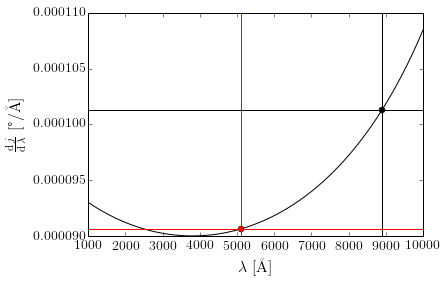

In [156]:
fig, ax = plt.subplots(1,1)
ax.plot(lamda, ang, '-k')
ax.plot(l1, angular_dispersion(l1).to(1/ureg.angstrom), 'or')
ax.plot(l2, angular_dispersion(l2).to(1/ureg.angstrom), 'ok')
ax.axvline(l1.m, color='r')
ax.axvline(l2.m, color='k')
ax.axhline(angular_dispersion(l1).to(1/ureg.angstrom).m, color='r')
ax.axhline(angular_dispersion(l2).to(1/ureg.angstrom).m, color='k')

ax.set_xlabel('$\\lambda$ $[\\si{\\angstrom}]$')
ax.set_ylabel('$\\frac{\\operatorname{d}j}{\\operatorname{d}\\lambda}$ $[\\si[per-mode=symbol]{\\degree\\per\\angstrom}]$')
fig.savefig('./pic/ang.pdf')

### B

In [98]:
G = 600 / ureg.mm
g = 1/G
l = 2 * ureg.cm
lam = 6200 * ureg.angstrom

In [99]:
R = g / lam
print R.to(ureg.dimensionless).m

2.68817204301


In [100]:
i = 45 * ureg.degree
m = 2

In [101]:
lam = g*np.sin(i.to(ureg.radian))/m
print 'lam = ', lam.to(ureg.angstrom)

lam =  5892.55650989 angstrom


### C

In [105]:
R = 2300
lam = 8000 * ureg.angstrom
l = 1 * ureg.cm

$R_{max} = \frac{2l}{\lambda}$

In [123]:
# R = m * N
# R_{max} = 2l/lambda = 2 * N * d / lambda  <=> l = R/2 * lambda// g = grid spacing
# Nd = l <=> d = l/N = R/2*lambda / N = R/2*lambda / (R/m) = lambda/(2m)
# g = 1/d

#R = 1.22*lam / D
g = R * lam
G = 1/g
print G.to(1/ureg.mm)

0.54347826087 1 / millimeter


### E

In [2]:
from scipy.stats import norm

In [3]:
C = 10.
amplitude = np.array([20,10,8,4,8])
location = np.array([0,5,-1,-4,-8])
scale = np.array([2,1.5,0.5,0.5, 2.])

RES = 300.
Xs = np.linspace(-10, 10, RES)
Y1 = C * np.ones(RES)
Y1 -= 40 * norm(loc=location[0], scale=scale[0]).pdf(Xs)
Y2  = C * np.ones(RES)

for a,l,s in zip(amplitude, location, scale):
    Y2 -= a * norm(loc=l, scale=s).pdf(Xs)

/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


In [4]:
A = np.sum((C - Y1) * (20./RES))
print A
l = A / C
print l
L = l/2.
print L

YA = np.zeros(RES)
YA[Xs>-L] = C
YA[Xs>L] = 0

39.866645738
3.9866645738
1.9933322869


/home/jhaux/.local/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


/home/jhaux/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


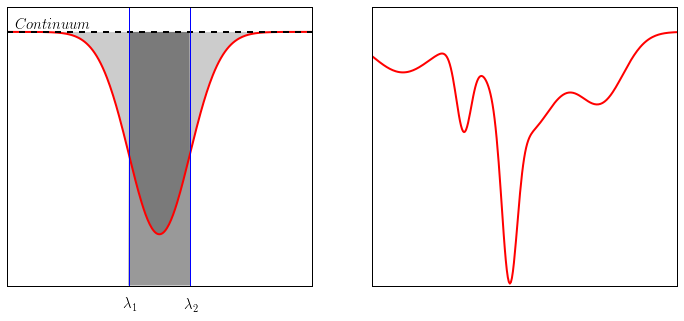

In [7]:
f, AX = plt.subplots(1,2, figsize=(12,5))

(ax1, ax2) = AX
ax1.fill_between(Xs, C*np.ones(RES), Y1, alpha = 0.2, color='k', edgecolor='None')
ax1.fill_between(Xs, C*np.zeros(RES), YA, alpha = 0.4, color='k', edgecolor='None')
ax1.plot(Xs, Y1, 'r-', lw=2)
ax1.plot(Xs, C*np.ones(RES), 'k--', lw=2)

ax1.axvline(-L)
ax1.axvline(L)

ax1.text(-L-0.4,-1, '$\\lambda_1$', fontsize=15)
ax1.text( L-0.4,-1, '$\\lambda_2$', fontsize=15)
ax1.text( -9.5,C+0.15, '$Continuum$', fontsize=15)

ax2.plot(Xs, Y2, 'r', lw=2)

for ax in AX:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim(0,11)

f.savefig('./pic/ew.pdf')